In [4]:
# mean and standard deviation calculation
from datetime import datetime
import pandas as pd
import numpy as np
import time

#calculating mean and standard deviation for official SF marathon data
race_sec = "sec_SF2017.csv"

#reading csv
race_sec_df = pd.read_csv(race_sec, encoding = 'latin-1')


#SF mean
race_mean = np.mean(race_sec_df["Finish_Sec"])
race_std=np.std(race_sec_df["Finish_Sec"])

#SF std
time.strftime("%H:%M:%S", time.gmtime(race_mean))
time.strftime("%H:%M:%S", time.gmtime(race_std))

'00:52:41'

In [5]:
#calculating mean and standard deviation for strava data
strava_sec = "Strava_SF2017.csv"

#reading csv
strava_sec_df = pd.read_csv(strava_sec, encoding = 'latin-1')


#strava mean
strava_mean = np.mean(strava_sec_df["Finish_Sec"])
time.strftime("%H:%M:%S", time.gmtime(strava_mean))


#strava_std
strava_std=np.std(strava_sec_df["Finish_Sec"])
time.strftime("%H:%M:%S", time.gmtime(strava_std))

'00:54:26'

In [6]:
import pandas as pd
import numpy as np


SFmarathon = "runcount_SF2017.csv"

#reading csv
sfmarathon = pd.read_csv(SFmarathon, encoding = 'latin-1')
sfmarathon.head()

,Finish_Sec,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Place,Gun Time,Age_grade,Sex,Age,Finish_Sec.1
0,"(9000, 9060]",0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(9060, 9120]",1,1,1,1,1,1,1,1,1,1,1,1,1
2,"(9120, 9180]",1,1,1,1,1,1,1,1,1,1,1,1,1
3,"(9180, 9240]",1,1,1,1,1,1,1,1,1,1,1,1,1
4,"(9240, 9300]",2,2,2,2,2,2,2,2,2,2,2,2,2


In [7]:
import pandas as pd
import numpy as np

Strava = "Strava_SF2017_count.csv"

#reading csv
strava = pd.read_csv(Strava, encoding = 'latin-1')
strava.head()

,Finish_Sec,Rank,Name,Gender,Age,Finish,Pace,Strava Activity,Finish_Sec.1
0,"(9000, 9060]",0,0,0,0,0,0,0,0
1,"(9060, 9120]",0,0,0,0,0,0,0,0
2,"(9120, 9180]",1,1,1,1,1,1,1,1
3,"(9180, 9240]",0,0,0,0,0,0,0,0
4,"(9240, 9300]",1,1,1,1,1,1,1,1


In [8]:
#SF Marathon
import time
from datetime import datetime
x_plot=list(range(9060,37800, 60))
x_ticks = []
for x in x_plot:
    x_ticks.append(str(time.strftime("%H:%M:%S", time.gmtime(x))))
    
x = []
for i in x_ticks:
    x.append(datetime.strptime(i,'%H:%M:%S').time())

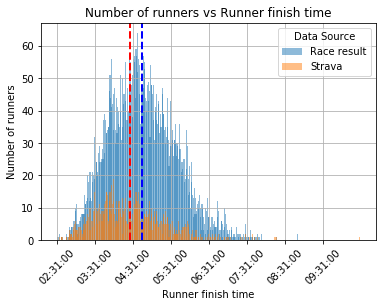

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import time

bar_width = 100
a1 = plt.bar(x,sfmarathon["Name"],bar_width, align='center', alpha=0.5, label='Race result')
a2 = plt.bar(x,strava["Name"],bar_width, align='center', alpha=0.5, label='Strava')

plt.xlabel('Runner finish time')
plt.ylabel('Number of runners')



#race_mean
plt.axvline(race_mean, color='b', linestyle='dashed', linewidth=2)

#strava_mean
plt.axvline(strava_mean, color='r', linestyle='dashed', linewidth=2)

plt.xticks(x, rotation=45)
plt.grid()
#you can change the nbins to whatever number and it will change the ticks
plt.locator_params(nbins=8, axis ='x')
plt.title('Number of runners vs Runner finish time')
plt.legend(handles = [a1, a2],title="Data Source", loc = "upper right")
plt.savefig("strava vs race.png")
plt.show( )


In [11]:
#FROM SFmarathon
import pandas as pd
import numpy as np

SFmarathons = "SFmarathon2017split.csv"

#reading csv
sfmarathons = pd.read_csv(SFmarathons, encoding = 'latin-1')
sfmarathons.head()

,Unnamed: 0,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Place,Gun Time,Age_grade,Sex,Age
0,0,1,Jorge Maravilla,"Mill Valley, CA",3,02:28:23,00:05:40,M 35-39/0,1,2:28:23,84.71%,M,39
1,1,2,Semereab Gebrekidan,"Oakland, CA",81,02:31:07,00:05:46,M 30-34/0,2,2:31:07,81.37%,M,32
2,2,3,Ben Demaree,"Berkeley, CA",61,02:32:10,00:05:49,M 25-29/0,3,2:32:10,80.81%,M,25
3,3,4,Andrew Monaghan,"Fort Collins, CO",33,02:33:37,00:05:52,M 20-24/1,4,2:33:37,80.05%,M,23
4,4,5,Chris Jordan,"GB,",100,02:34:04,00:05:53,M 35-39/1,5,2:34:04,80.76%,M,37


In [12]:
#changing to datetime.time
sfmarathons['Net_time'] = pd.to_datetime(sfmarathons['Net_time'],format= '%H:%M:%S').dt.time
sfmarathons['Pace'] = pd.to_datetime(sfmarathons['Pace'],format= '%H:%M:%S').dt.time

In [13]:
#Selecting Male Only and female Only to compare to Net_time
male_runner = sfmarathons.loc[sfmarathons["Sex"] == "M", "Net_time"]
male_age = sfmarathons.loc[sfmarathons["Sex"] == "M", "Age"]

female_runner = sfmarathons.loc[sfmarathons["Sex"] == "F", "Net_time"]
female_age = sfmarathons.loc[sfmarathons["Sex"] == "F", "Age"]

print(male_runner.count())
print(female_runner.count())

4221
2364


In [14]:
#male only age vs Finish time
ym = []
for i in male_runner:
    ym.append(i)
am = []
for i in male_age:
    am.append(int(i))
    
#female only age vs Finish time
yf = []
for i in female_runner:
    yf.append(i)
af = []
for i in female_age:
    af.append(int(i))

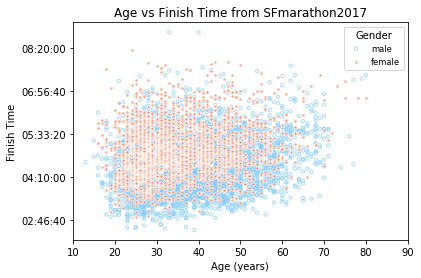

In [16]:
import matplotlib.pyplot as plt
#Finish Time vs Sex and Age

y_axis = ym
x_axis = am

y_axis1 = yf
x_axis1 = af

m_age_finish = plt.scatter(x_axis, y_axis, marker="o", facecolors="", edgecolors="lightskyblue",
            s= 10, alpha=0.70)


f_age_finish = plt.scatter(x_axis1, y_axis1, marker="o", facecolors="coral", edgecolors="white",
            s= 10, alpha=0.70)

lgnd = plt.legend((m_age_finish,f_age_finish),('male','female'), fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Gender", 
                  labelspacing=0.5)

plt.xlim(10,90)

plt.xlabel('Age (years)')
plt.ylabel('Finish Time')
plt.title('Age vs Finish Time from SFmarathon2017')
plt.savefig("SF_agevstime.png")
plt.show()

In [17]:
#STRAVA
import pandas as pd
import numpy as np

stravaSF = "Strava_SF2017.csv"

#reading csv
stravasf = pd.read_csv(stravaSF, encoding = 'latin-1')
stravasf.head()

,Unnamed: 0,Rank,Name,Gender,Age,Finish,Pace,Strava Activity,Finish_Sec
0,0,1,Jorge Maravilla,M,39.0,02:28:22,3:31,The San Francisco Marathon - 40th Anniver...,8902
1,1,2,Ben Demaree,M,25.0,02:32:10,3:36,SF Marathon. Third Place!,9130
2,2,3,Chris J.,M,37.0,02:34:42,3:40,SF marathon . 6th place . Unforgettable.,9282
3,3,4,Matthew Duffy,M,27.0,02:37:04,3:43,Can't describe how happy I am to finish a...,9424
4,4,5,Nathan Krah,M,NaN,02:38:50,3:46,SF marathon - rough day out there,9530


In [18]:
# #format the colume Finish to date time
stravasf['Finish'] = pd.to_datetime(stravasf['Finish'], format = "%H:%M:%S").dt.time

In [19]:
#Selecting Male Only and female Only to compare to Net_time

male_r = stravasf.loc[stravasf["Gender"] == "M", "Finish"]
male_a = stravasf.loc[stravasf["Gender"] == "M", "Age"]

female_r = stravasf.loc[stravasf["Gender"] == "F", "Finish"]
female_a = stravasf.loc[stravasf["Gender"] == "F", "Age"]


In [20]:
#male only age vs Finish time
ysm = []
for i in male_r:
    try:
        ysm.append(i)
    except:
        ysm.append(0)
    
asm = []
for i in male_a:
    if i<100:
        try:
            asm.append(int(i))
        except:
            asm.append(0)
    else:
        asm.append(0)

#female only age vs Finish time
ysf = []
for i in female_r:
    try:
        ysf.append(i)
    except:
        ysf.append(0)
    
asf = []
for i in female_a:
    if i<100:
        try:
            asf.append(int(i))
        except:
            asf.append(0)
    else:
        asf.append(0)

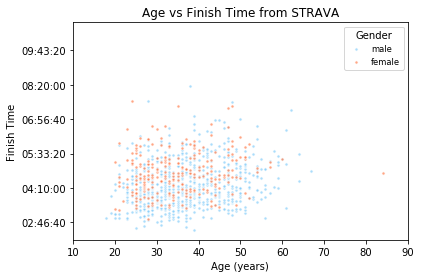

In [22]:
#Finish Time vs Sex and Age

y_axis = ysm
x_axis = asm

y_axis1 = ysf
x_axis1 = asf

m_age_finish = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightskyblue", edgecolors="white",
            s= 10, alpha=0.70)


f_age_finish = plt.scatter(x_axis1, y_axis1, marker="o", facecolors="coral", edgecolors="white",
            s= 10, alpha=0.70)

lgnd = plt.legend((m_age_finish,f_age_finish),('male','female'), fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Gender", 
                  labelspacing=0.5)

plt.xlim(10,90)

plt.xlabel('Age (years)')
plt.ylabel('Finish Time')
plt.title('Age vs Finish Time from STRAVA')
plt.savefig("Strava_agevstime.png")
plt.show()

In [23]:
#SFmarathon # of male and female runner
sf_m_count = male_runner.count()
sf_f_count = female_runner.count()

#Strava SFmarathon # of male and female runner
strava_m_count = male_r.count()
strava_f_count = female_r.count()

#male or female who doesn't use strava
diff_m = sf_m_count - strava_m_count
diff_f = sf_f_count - strava_f_count

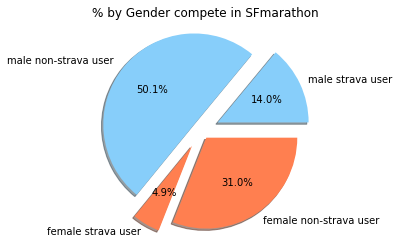

In [25]:
#pie chart
labels = ['male strava user', 'male non-strava user ', 'female strava user', 'female non-strava user']
 
sizes = [strava_m_count, diff_m, strava_f_count, diff_f]
colors = ["lightskyblue", "lightskyblue", "coral", "coral"]
explode = (0.2, 0.1, 0.2, 0.1)

plt.title("% by Gender compete in SFmarathon")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=0)


plt.axis("equal")
plt.savefig("total_compete.png")
plt.show()

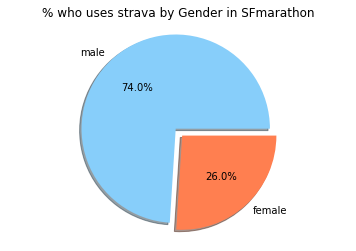

In [26]:
#pie chart
labels = ["male", "female"]
sizes = [strava_m_count, strava_f_count]
colors = ["lightskyblue", "coral"]
explode = (0, 0.1)

plt.title("% who uses strava by Gender in SFmarathon")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=0)

plt.axis("equal")
plt.savefig("stravacompete.png")
plt.show()

In [27]:
#percent of male and female competed in SFmarathon
p_male_strava_users = (strava_m_count/sf_m_count)*100

#percent male and female who used strava in SFmarathon 
p_female_strava_users = (strava_f_count/sf_f_count)*100

Total_strava_users = ((strava_m_count + strava_f_count) / (sf_m_count + sf_f_count)) *100

print(p_male_strava_users)
print(p_female_strava_users)
print(Total_strava_users)

21.8431651267
13.7055837563
18.9217919514
